In [1]:
import sympy  as sp
from sympy import *
import numpy as np
#Para resolver sistemas de ecuaciones diferencials 
from sympy.solvers.ode.systems import dsolve_system

In [2]:
sp.interactive.printing.init_printing(use_latex=True)

In [3]:
#Declaración de las variables que vamos a usar
t, x, y, z = sp.symbols('t x y z')
#Vector con las variables que vamos a usar 
variables = [t,x,y,z]

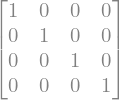

In [5]:
#Expreso la métrica en forma matricial 
g = [
    [1,0,0,0],
    [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]
sp.Matrix(g)


In [15]:
g_inv = g
            

In [13]:
#Este vector va a contener la matriz g derivada respecto de cada la variable
#Por ejemplo derivadas_variable[0] es la derivada de toda la matriz respecto de t
#            derivadas_variable[1] es la derivada de toda la matriz respecto de x
#Y derivadas_variable[1][0][0] es la derivad parcial de g_{0,0} respecto x
# y así sucesivamente 
derivadas_variable = []

for variable in variables: 
    derivada_variable = [[0 for i in variables] for j in variables]
    for i in range(len(variables)):
        for j in range(len(variables)): 
            func = g[i][j]
            #Para no hacer la derivada de un número 
            if type(func) == sp.core.mul.Mul or type(func) == sp.core.power.Pow: 
                derivada_variable[i][j] = simplify(func.diff(variable))
                
    derivadas_variable.append(derivada_variable)
derivadas_variable

In [16]:
simbolos_chistoffle = [[[0 for j in variables] for i in variables] for m in variables]


for m in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            simbolo = 0
            #El sumatorio respecto del indice libre l 
            for l in range(len(variables)):
                #Para evitar hacer una multiplicación por 0 
                if  g_inv[m][l] != 0: 
                    simbolo =simbolo + g_inv[m][l]*(derivadas_variable[j][i][l]+derivadas_variable[i][j][l]-derivadas_variable[l][i][j])
            simbolo =1/2*simbolo
            simbolos_chistoffle[m][i][j] = simplify(simbolo)

In [17]:
#Variable para poder derivar 
tau = sp.symbols("tau")

#Defino las derivadas, esto para poder resolverlo 
dt = sp.Function('dt')(tau)
dx = sp.Function("dx")(tau)
dy = sp.Function('dy')(tau) 
dz =  sp.Function('dz')(tau)

#Quitamos dz
variables_derivadas = [dt,dx,dy,dz]


In [18]:
#Esto va a con
geodesicas = [i.diff(tau) for i in variables_derivadas]

for variable in range(len(variables)): 
    for i in range(len(variables)):
        for j in range(len(variables)):
            geodesicas[variable] = geodesicas[variable] +simplify( simbolos_chistoffle[variable][i][j]*variables_derivadas[i]*variables_derivadas[j])
    geodesicas[variable] = sp.Eq(geodesicas[variable],0)
    


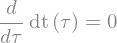

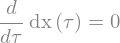

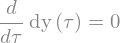

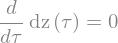

In [23]:
for v in geodesicas: 
    display(v)

In [24]:
t = sp.Function('t')(tau)
x = sp.Function('x')(tau)
y = sp.Function('y')(tau)

In [25]:
u_0 =  sp.Function('u_0')(tau)
u_1 = sp.Function("u_1")(tau)
u_2 = sp.Function("u_2")(tau)

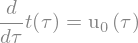

In [26]:
dt = sp.Eq(t.diff(),u_0)
dt

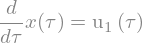

In [27]:
dx = sp.Eq(x.diff(),u_1)
dx

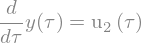

In [28]:
dy = sp.Eq(y.diff(),u_2)
dy

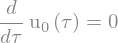

In [36]:
du_0 = sp.Eq(u_0.diff(),0)
du_0

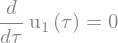

In [37]:
du_1 = sp.Eq(u_1.diff(),0)
du_1

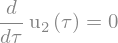

In [38]:
du_2 = sp.Eq(u_2.diff(),0)
du_2

In [39]:
dsolve_system([dt,dx,dy,du_0,du_1,du_2])